<h1><center> Exploratory Data Analysis of Stock Prices</center></h1>

In [1]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
from matplotlib import pyplot as plt

pd. set_option("display.max_columns", None)
%matplotlib inline

In [2]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

#### Fetch stock data from the web

In [3]:
df_BAC = web.DataReader('BAC', 'yahoo', start, end)
df_C = web.DataReader('C', 'yahoo', start='2006-01-01', end='2016-01-01')
df_GS = web.DataReader('GS', 'yahoo', start='2006-01-01', end='2016-01-01')
df_JPM = web.DataReader('JPM', 'yahoo', start='2006-01-01', end='2016-01-01')
df_MS = web.DataReader('MS', 'yahoo', start='2006-01-01', end='2016-01-01')
df_WFC = web.DataReader('WFC', 'yahoo', start='2006-01-01', end='2016-01-01')

In [4]:
df_BAC.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,33.942669
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,33.582184
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,33.625431


Create a list of the ticker symbols:

In [5]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

#### Concatenate the bank dataframes together to a single data frame.

In [6]:
bank_stocks = pd.concat([df_BAC, df_C, df_GS, df_JPM, df_MS, df_WFC], axis=1, keys=tickers)
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']  # Set the column name levels
bank_stocks.xs(key='Close', axis=1, level='Stock Info').head()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.080002,492.899994,128.869995,40.189999,58.310001,31.900000
2006-01-04,46.580002,483.799988,127.089996,39.619999,58.349998,31.530001
2006-01-05,46.639999,486.200012,127.040001,39.740002,58.509998,31.495001
2006-01-06,46.570000,486.200012,128.839996,40.020000,58.570000,31.680000
2006-01-09,46.599998,483.899994,130.389999,40.669998,59.189999,31.674999


#### What is the max Close price for each bank's stock throughout the time period?

In [7]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

Creating empty dataframe to store bank returns

In [8]:
df_returns = pd.DataFrame()

Create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.

In [9]:
for tick in tickers:
    df_returns[tick + 'returns'] = bank_stocks[tick]['Close'].pct_change()
df_returns.head()

,BACreturns,Creturns,GSreturns,JPMreturns,MSreturns,WFCreturns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


#### Create a pairplot using seaborn of the returns dataframe. What stock stands out to you?

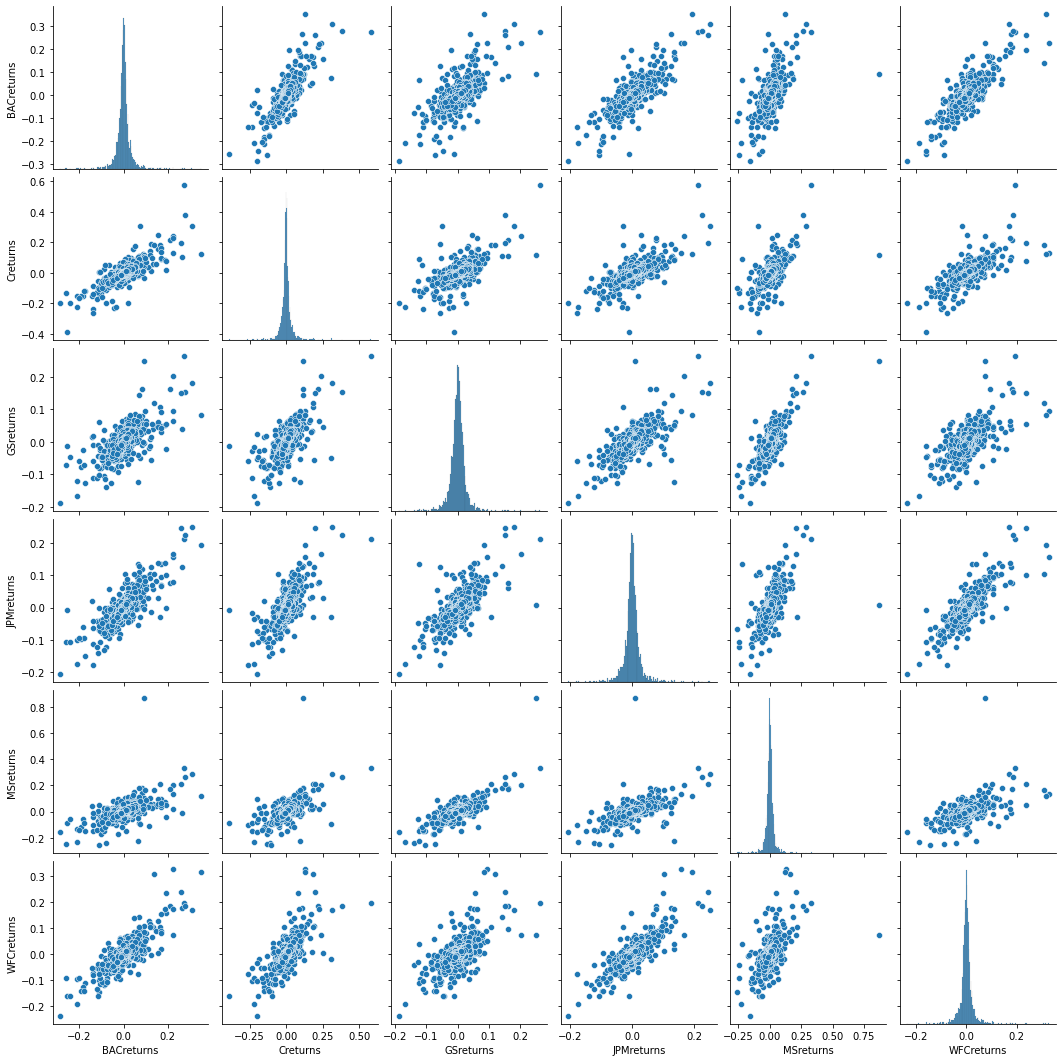

In [19]:
sns.pairplot(df_returns[1:])

Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns.
You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?

In [11]:
df_returns.idxmin()

BACreturns   2009-01-20
Creturns     2009-02-27
GSreturns    2009-01-20
JPMreturns   2009-01-20
MSreturns    2008-10-09
WFCreturns   2009-01-20
dtype: datetime64[ns]

In [12]:
df_returns.idxmax()

BACreturns   2009-04-09
Creturns     2008-11-24
GSreturns    2008-11-24
JPMreturns   2009-01-21
MSreturns    2008-10-13
WFCreturns   2008-07-16
dtype: datetime64[ns]

Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?

In [13]:
df_returns.std()

BACreturns    0.036647
Creturns      0.038672
GSreturns     0.025390
JPMreturns    0.027667
MSreturns     0.037819
WFCreturns    0.030238
dtype: float64

In [14]:
df_returns.loc['2015-01-01':'2015-12-31'].std()

BACreturns    0.016163
Creturns      0.015289
GSreturns     0.014046
JPMreturns    0.014017
MSreturns     0.016249
WFCreturns    0.012591
dtype: float64

#### Create a distplot using seaborn of the 2015 returns for Morgan Stanley

In [15]:
df_returns['MSreturns'].loc['2015-01-01':'2015-12-31'].head()

Date
2015-01-02   -0.002320
2015-01-05   -0.031258
2015-01-06   -0.028800
2015-01-07    0.014278
2015-01-08    0.014889
Name: MSreturns, dtype: float64

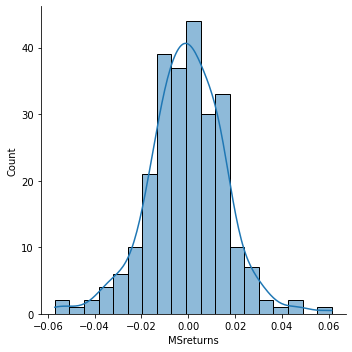

In [17]:
sns.displot(df_returns['MSreturns'].loc['2015-01-01':'2015-12-31'], kde=True)

#### Create a line plot showing Close price for each bank for the entire index of time.

<AxesSubplot:xlabel='Date'>

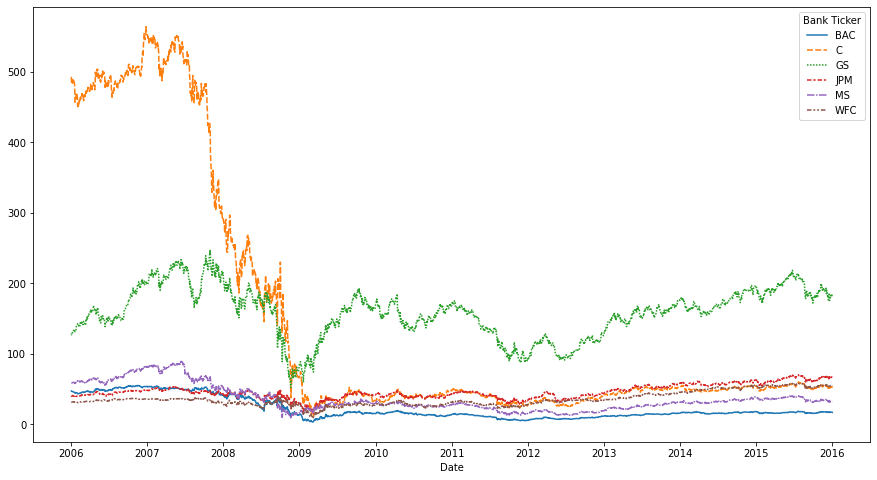

In [18]:
plt.figure(figsize = (15,8))
sns.lineplot(data = bank_stocks.xs(key='Close', axis=1, level='Stock Info'))